<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Membuat fungsi konvolusi

##Konvolusi tanpa library


**Membuat Fungsi Konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa citra masukan, kernel berupa matriks untuk memfilter citra, nilai stride/ besarnya pergeseran untuk setiap konvolusi, dan nilai pada yang akan ditambahkan pada citra

In [46]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

d. Load citra yang akan diproses dan ubah menjadi citra keabuan 


In [23]:
img = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening 
sebagai berikut:

**Menentukan kernel yang akan digunakan**

SHARPEN


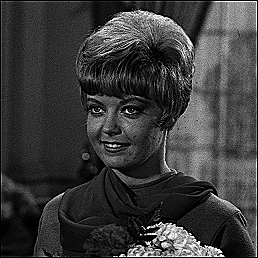

In [13]:
# IMAGE SHARPEN 
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
#memanggil fungsi konvolusi 
print ('SHARPEN')
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

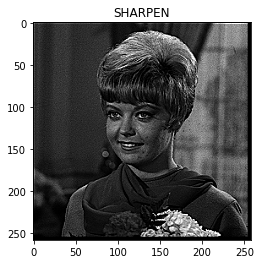

In [39]:
# IMAGE SHARPEN 
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
img_kernel_sharpen = img_gray.copy()
img_kernel_sharpen= convolution2d(img_gray,kernel_sharpen,1,2)

plt.title("SHARPEN")
plt.imshow(img_kernel_sharpen, cmap='gray',vmin=0, vmax=255)

EMBOSS


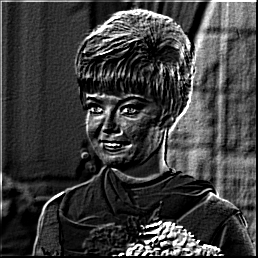

In [19]:
# EMBOSS

kernel_embos = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                           [0, 1, 2]])
print ('EMBOSS')
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

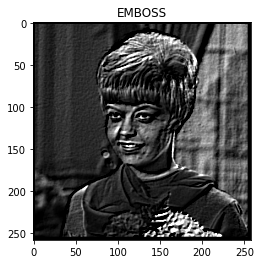

In [40]:
# IMAGE EMBOSS 
kernel_embos = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                           [0, 1, 2]])
img_kernel_emboss = img_gray.copy()
img_kernel_emboss= convolution2d(img_gray,kernel_embos,1,2)

plt.title("EMBOSS")
plt.imshow(img_kernel_emboss, cmap='gray',vmin=0, vmax=255)

Left Sobel Edge Detection


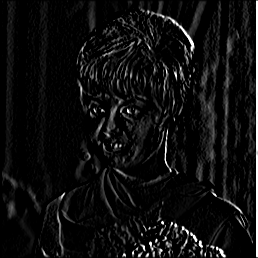

In [17]:
# Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
print('Left Sobel Edge Detection')
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

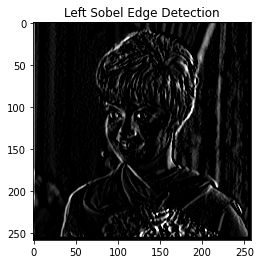

In [41]:
# Left Sobel Edge Detection 
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
img_kernel_sobel = img_gray.copy()
img_kernel_sobel = convolution2d(img_gray,kernel_sobel,1,2)

plt.title("Left Sobel Edge Detection")
plt.imshow(img_kernel_sobel, cmap='gray',vmin=0, vmax=255)

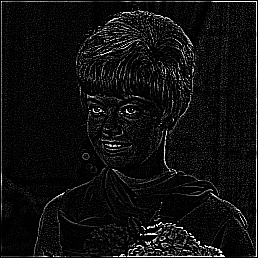

In [ ]:
# Canny edge Detection

kernel_Canny = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_Canny, 1, 2))
     

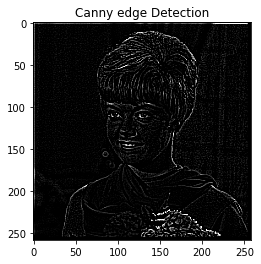

In [42]:
# Canny edge Detection
kernel_Canny = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
img_kernel_Canny = img_gray.copy()
img_kernel_Canny = convolution2d(img_gray,kernel_Canny,1,2)

plt.title("Canny edge Detection")
plt.imshow(img_kernel_Canny, cmap='gray',vmin=0, vmax=255)

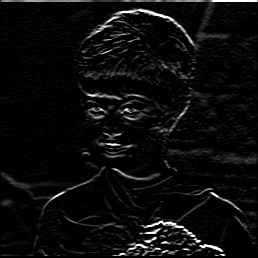

In [ ]:
#Prewitt Edge DetectioN
kernel_Prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_Prewitt, 1, 2))

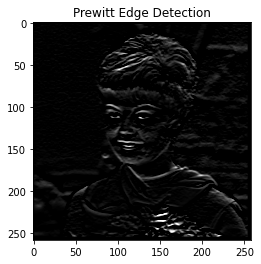

In [43]:
#Prewitt Edge DetectioN
kernel_Prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
img_kernel_Prewitt = img_gray.copy()
img_kernel_Prewitt = convolution2d(img_gray,kernel_Prewitt,1,2)

plt.title("Prewitt Edge Detection")
plt.imshow(img_kernel_Prewitt, cmap='gray',vmin=0, vmax=255)

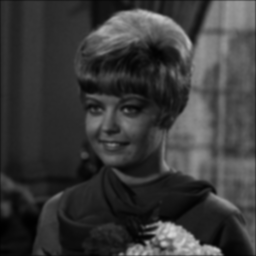

In [ ]:
#5x5 Gaussian Blur 
kernel_Gaussian_blur = np.array([[1,4,6,4,1],
                                 [4,16,24,16,4],
                                 [6,24,36,24,6],
                                 [4,16,24,16,4],
                                 [1,4,6,4,1]])* 1/256 
cv2_imshow(convolution2d(img_gray, kernel_Gaussian_blur, 1, 2))

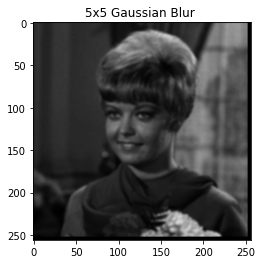

In [44]:
#5x5 Gaussian Blur 
kernel_Gaussian_blur = np.array([[1,4,6,4,1],
                                 [4,16,24,16,4],
                                 [6,24,36,24,6],
                                 [4,16,24,16,4],
                                 [1,4,6,4,1]])* 1/256 
img_kernel_Gaussian_blur = img_gray.copy()
img_kernel_Gaussian_blur = convolution2d(img_gray,kernel_Gaussian_blur,1,2)

plt.title("5x5 Gaussian Blur ")
plt.imshow(img_kernel_Gaussian_blur, cmap='gray',vmin=0, vmax=255)

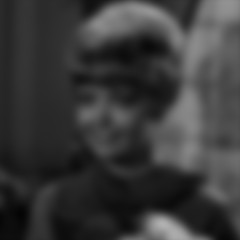

In [ ]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))
     

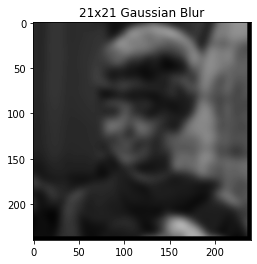

In [45]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

img = img_gray.copy()
img = convolution2d(img, gauss_kernel ,1,2)

plt.title("21x21 Gaussian Blur")
plt.imshow(img, cmap='gray',vmin=0, vmax=255)